# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
print(df.info())
print(df.isna().sum().sort_values(ascending=False))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Пропусков нет: total_images, last_price, total_price, first_day_exposition, rooms, floor, studio, open_plan

Пропусков относительно немного:  living_area, kitchen_area, locality_name,airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, days_exposition 

Много пропусков: ceiling_height,is_apartment, balcony, parks_nearest, ponds_nearest


Странные данные: 	ceiling_height =1,100 (потолки 1 и 100метров не вызывает доверие ), floors_total = 60 (в РФ не помню, чтобы такие дома были, надо посмотреть), living_area = 2 (маловата жилая площадь), airports_nearest = 0 (дом прям в аэропорту)

### Выполните предобработку данных

#### Изменение формата столбцов и названия колонок

Заменим навания столбцов на более приличные

In [4]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                      'ponds_around3000': 'ponds_around_3000',
                       'parks_around3000' : 'parks_around_3000' })
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

-----

Начнем с очевидного - для удобства дальнейшей работы преобразуем first_day_exposition в формат даты 

In [5]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'],
      shape=(1491,), dtype=object)

Чч:мм:сс отбрасываем, потому что там нули

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.ceil('1D')
df['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

---

Заполнение пропусков начнем там, где их больше всего - 
ceiling_height (высота потолков),is_apartment (апартаменты или нет), balcony (число балконов), parks_nearest (расстояние до парка), ponds_nearest(расстояние до водоема)

Оценив еще раз данные решил для начала заполнить пропуски c числовыми значениями на '-1000' (число выбрано для того, чтобы была возможность отформатировать числа по типу данных,например float в int, где это возможно. -1000 выбрано, как число, которое не может сущестовать в этих данных), а потом уже обрабоать столбцы, где могу что-то сделать (решил пойти от большого к меньшему)
Не числовые заменим на "unknown".

In [7]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(-1000)
df = df.fillna('unknown')
df.isna().sum()


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

Теперь сделаем функцию проверяющую вохможность замены float на int, где это возможно произведем замену

In [8]:
for col in df.select_dtypes(include=['float64']).columns:
    ix = df[col].astype('int')
    if ix.sum() - df[col].sum() == 0:
        df[col] = ix

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Теперь данные "причесаны"

Теперь можно обработать только то, где можно выдвинуть какие-то гипотизы
1. Балконы не проставлены там, где их нет
2. Много пропусков в апартаментах, скорее всего в строках, где недвижимость не является таковой
3. floors_total  возможно отсутствуют в одноэтажных домах, можно посомтреть на каком этаже помещение и в городе или нет

In [9]:
df[df['balcony']==-1000].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,unknown,False,False,25.00,-1000,Санкт-Петербург,18863,16028,1,482,2,755,-1000
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,unknown,False,False,41.00,-1000,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,-1000.00,12,14.40,5,unknown,False,False,9.10,-1000,городской посёлок Янино-1,-1000,-1000,-1000,-1000,-1000,-1000,55
8,20,2900000,33.16,2018-05-23,1,-1000.00,27,15.43,26,unknown,False,False,8.81,-1000,посёлок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,189
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,unknown,False,False,8.50,-1000,Санкт-Петербург,38357,13878,1,310,2,553,137
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.60,1,unknown,False,False,9.00,-1000,Санкт-Петербург,22108,10698,3,420,0,-1000,397
19,16,14200000,121.00,2019-01-09,3,2.75,16,76.00,8,unknown,False,False,12.00,-1000,Санкт-Петербург,38900,12843,0,-1000,0,-1000,97
23,11,2950000,32.00,2016-10-29,1,2.60,9,17.70,9,unknown,False,False,6.10,-1000,Санкт-Петербург,15414,14211,2,517,1,190,615
26,6,4050000,60.00,2017-04-28,4,-1000.00,5,43.00,4,unknown,False,False,7.00,-1000,Санкт-Петербург,11580,10510,0,-1000,1,95,265
30,12,2200000,32.80,2018-02-19,1,-1000.00,9,-1000.00,2,unknown,False,False,-1000.00,-1000,Коммунар,-1000,-1000,-1000,-1000,-1000,-1000,63


Никакой зависимости не заметно, поэтому будем считать, что балконов в этих объектах нет

In [10]:
df['balcony'].replace(-1000,0, inplace=True)
df.head()

/var/folders/4k/495js9pn5gv0v3107j2ysgqm0000gn/T/ipykernel_12691/3595797875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].replace(-1000,0, inplace=True)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,-1000
1,7,3350000,40.4,2018-12-04,1,-1000.00,11,18.6,1,unknown,False,False,11.0,2,посёлок Шушары,12817,18603,0,-1000,0,-1000,81
2,10,5196000,56.0,2015-08-20,2,-1000.00,5,34.3,4,unknown,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,-1000.00,14,-1000.0,9,unknown,False,False,-1000.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


Теперь аппартаменты

In [11]:
display(df[df['is_apartment']=='unknown'].head(10))
df[df['is_apartment']==True].head(10)
df.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,unknown,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,-1000
1,7,3350000,40.40,2018-12-04,1,-1000.00,11,18.60,1,unknown,False,False,11.00,2,посёлок Шушары,12817,18603,0,-1000,0,-1000,81
2,10,5196000,56.00,2015-08-20,2,-1000.00,5,34.30,4,unknown,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,-1000.00,14,-1000.00,9,unknown,False,False,-1000.00,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,unknown,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,-1000.00,12,14.40,5,unknown,False,False,9.10,0,городской посёлок Янино-1,-1000,-1000,-1000,-1000,-1000,-1000,55
6,6,3700000,37.30,2017-11-02,1,-1000.00,26,10.60,6,unknown,False,False,14.40,1,посёлок Парголово,52996,19143,0,-1000,0,-1000,155
7,5,7915000,71.60,2019-04-18,2,-1000.00,24,-1000.00,22,unknown,False,False,18.90,2,Санкт-Петербург,23982,11634,0,-1000,0,-1000,-1000
8,20,2900000,33.16,2018-05-23,1,-1000.00,27,15.43,26,unknown,False,False,8.81,0,посёлок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,unknown,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1000,0,-1000,289


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725
True,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
unknown,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924,20924


Аппартаменты довольно редко встречаются + ничем особо не выделяются. С учетом перевеса незаполненных данных, судить о 22000 имея 2000 не разумно. Я бы полностью удалил этот столбец, но удалить можно всегда. Поэтому просто не буду его учитывать при дальнейшем исследовании. 

Количество этажей в доме

In [12]:
df[df['floors_total'] == -1000].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,-1000.0,-1000,30.80,4,unknown,False,False,12.00,0,Санкт-Петербург,39197,12373,1,123,0,-1000,49
237,4,2438033,28.10,2016-11-23,1,-1000.0,-1000,20.75,1,unknown,False,False,-1000.00,0,Санкт-Петербург,22041,17369,0,-1000,1,374,251
457,4,9788348,70.80,2015-08-01,2,-1000.0,-1000,38.40,12,unknown,False,False,10.63,0,Санкт-Петербург,37364,8322,2,309,2,706,727
671,4,6051191,93.60,2017-04-06,3,-1000.0,-1000,47.10,8,unknown,False,False,16.80,0,Санкт-Петербург,22041,17369,0,-1000,1,374,123
1757,5,3600000,39.00,2017-04-22,1,-1000.0,-1000,-1000.00,9,unknown,False,False,-1000.00,0,Санкт-Петербург,22735,11618,1,835,1,652,77
1930,1,9750000,66.77,2016-05-13,2,-1000.0,-1000,-1000.00,4,unknown,False,False,-1000.00,0,Санкт-Петербург,39886,10660,1,2276,3,244,90
2392,7,5395770,53.00,2017-06-29,2,-1000.0,-1000,29.00,22,unknown,False,False,9.00,0,Санкт-Петербург,43074,10820,0,-1000,0,-1000,48
2846,4,2325000,27.80,2016-09-21,1,-1000.0,-1000,19.40,15,unknown,False,False,-1000.00,0,Санкт-Петербург,22041,17369,0,-1000,1,374,307
2952,10,6500000,54.30,2019-04-23,1,-1000.0,-1000,22.20,6,unknown,False,False,12.30,0,Санкт-Петербург,23606,3148,0,-1000,0,-1000,-1000
3031,9,6400000,56.70,2018-03-27,2,-1000.0,-1000,32.00,12,unknown,False,False,12.00,0,Кудрово,-1000,-1000,-1000,-1000,-1000,-1000,231


Встречаются, как и в городе, так и нет. Разная этажнасть и тд. В данном столбце оставляю unknown

<font color='blue'>Вывод по работе в разделе 2.1:  </font>Заменили названия столбцов на более читаемые. Предположили, что пропуски в балконах связаны с их отсутствием.Остальные пропуски с числовыми значением заменили на "-1000", не числовые "unknown". 

<font color='blue'>Доп вывод по работе в разделе 2.1:  </font> пропуски были в следующих столбцах и были в следующем количестве: 
is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49

Столбцы is_apartment, balcony, floors_total - рассмотрели подробно. 
locality_name - имеет не так много пропусков, поэтому можем их не трогать. 
kitchen_area, living_area - данные заполняемые людьми, их могли не указать по ошибке, специально, чтобы не подрывать интерес к недвижимости из-за маленького значения и тд. Предположить какие-то значения тут сложно.
Остальные столбцы содержат информацию полученную автоматическим заполнением - расстояния до парков, аэропортов, водоемов и до центра города, а также количество парков и водоемов в радиусе 3000. Данные столбцы тоже проблематично заполнить какими-то значениями, введу незнания природы их появления. Может быть отсутствие парка, а может не правильно сработал геосервис.

#### Проверка явных и скрытых дубликатов

Необходимо преобразовать locality_name, потому что там встречаются неявные дубликаты. Для начала надо посмотреть, что там примерно происходит

In [13]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Начнем с очевидного ё и е

In [14]:
df.locality_name = df.locality_name.str.replace('ё', 'е')

Так же в глаза бросается изобилие поселков городского типа, городских поселков и прочего. Посмотрим какие есть вариации и заменим их на что-то одно

In [15]:
df[df['locality_name'].str.contains('городск')]['locality_name'].unique()

array(['городской поселок Янино-1', 'поселок городского типа Красный Бор',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский',
       'поселок городского типа Кузьмоловский',
       'поселок городского типа Ефимовский',
       'поселок городского типа Рощино',
       'поселок городского типа Синявино',
       'поселок городского типа Советский',
       'поселок городского типа Токсово',
       'поселок городского типа Вырица',
       'городской поселок Большая Ижора', 'городской поселок Павлово',
       'городской поселок Лесогорский', 'поселок городского типа Рахья',
       'городской поселок Новоселье', 'городской поселок Федоровское',
       'поселок городского типа имени Свердлова', 'городской поселок Мга',
       'поселок городского типа Кузнечное',
       'поселок городского типа имени Морозова',
       'поселок городского типа Тайцы',
       'поселок городского типа Ульяновка',
       'поселок городского типа Дубровка',
       'поселок городског

In [16]:
df.locality_name = df.locality_name.str.replace('городской поселок', 'поселок городского типа')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

In [17]:
df.duplicated().sum()

np.int64(0)

<font color='blue'>Вывод по работе в разделе 2.2:  </font> Заменили скрытые дубликаты, явных потворений в конечном df нет

<b><font color='blue'>Вывод по работе в разделе 2:  </font> </b> Сделали предобработку данных. Выстовили правильные форматы в столбцах (даты теперь даты, целые числа не дробные), где могли заменить пропуски сделали это, где нет заменили на -1000 или unknown, для того, чтобы Nan не мешали в дальнейшей работе. Проработали список локаций (это единственный столбец, который мог вызывать разночтнение и поэтому содержать неявные дубликаты). В нем произвели необходимые замены для чистоты столбца. Явных дубликатов по df не выявлено. Думаю, теперь можно приступать к обработке данных.  

### Добавьте в таблицу новые столбцы

Необходимо добавить следующие столбцы  
– цена одного квадратного метра;

– день публикации объявления (0 - понедельник, 1 - вторник и т. д.);

– месяц публикации объявления;

– год публикации объявления;

– тип этажа квартиры (значения — «первый», «последний», «другой»);

– расстояние до центра города в километрах.

In [18]:
df['price_meter'] = df['last_price'] / df['total_area']
df['price_meter'] = df['price_meter'].round(decimals=2)
df['price_meter'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118300e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price_meter, dtype: float64

Цена на метр квадратный добавлена, далее сделаем столбцы день, месяц, год

In [19]:
df['year']= df['first_day_exposition'].dt.year
df['month']= df['first_day_exposition'].dt.month
df['day']= df['first_day_exposition'].dt.weekday
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,-1000,120370.37,2019,3,3
1,7,3350000,40.4,2018-12-04,1,-1000.00,11,18.6,1,unknown,False,False,11.0,2,поселок Шушары,12817,18603,0,-1000,0,-1000,81,82920.79,2018,12,1
2,10,5196000,56.0,2015-08-20,2,-1000.00,5,34.3,4,unknown,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.71,2015,8,3
3,0,64900000,159.0,2015-07-24,3,-1000.00,14,-1000.0,9,unknown,False,False,-1000.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.10,2015,7,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00,2018,6,1


Далее - типы этажей

In [20]:
def check_floor(x):
    if x['floors_total'] == -1000:
        return 'unknown'
    if x['floors_total'] == 1:
        return 'other'
    if x['floor'] == 1:
        return 'first'
    if x['floor'] == x['floors_total']:
        return 'last'
    return 'other'

df['floor_type'] = df.apply(check_floor, axis=1)
display(df.loc[:,['floor', 'floors_total', 'floor_type']].head())
display(df[df['floor_type']=='last'].loc[:,['floor', 'floors_total', 'floor_type']].head())
df.groupby('floor_type')['floor_type'].count()


,floor,floors_total,floor_type
0,8,16,other
1,1,11,first
2,4,5,other
3,9,14,other
4,13,14,other


,floor,floors_total,floor_type
12,5,5,last
13,5,5,last
23,9,9,last
36,9,9,last
43,4,4,last


floor_type
first       2889
last        3336
other      17388
unknown       86
Name: floor_type, dtype: int64

К "другим" также отнес одноэтажные дома, потому что их, мне кажется, не праивльно относить к первоэтажным, речь все таки про первый этаж в многоэтажке.


Следующий этап расстояние до центра в км

In [21]:
df['centers_nearesе_km'] = df['city_centers_nearest']/1000
df['centers_nearesе_km'] = df['centers_nearesе_km'].astype(int)
df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,-1000,120370.37,2019,3,3,other,16
1,7,3350000,40.4,2018-12-04,1,-1000.00,11,18.6,1,unknown,False,False,11.0,2,поселок Шушары,12817,18603,0,-1000,0,-1000,81,82920.79,2018,12,1,first,18
2,10,5196000,56.0,2015-08-20,2,-1000.00,5,34.3,4,unknown,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.71,2015,8,3,other,13
3,0,64900000,159.0,2015-07-24,3,-1000.00,14,-1000.0,9,unknown,False,False,-1000.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.10,2015,7,4,other,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00,2018,6,1,other,8


<b><font color='blue'>Вывод по работе в разделе 3:  </font> </b> Добавили все необходмые столбцы (цена одного  $м^2$; разбили один столбец даты на три - день, месяц, год; добавили стобец типизации этажа; и получили столбец расстояния до центра города в км). Данные изменения помогут анализировать данные точнее и быстрее. 

### Проведите исследовательский анализ данных

#### Изучение основных параметров

Первый этап общего анализа данных - изучение каждого параметра отдельно. Основные параметры для этого раздела:

общая площадь;жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка

Первое, что могу сказать - это про пропуски. Один из вариантов пропусков - то, что их не вносили, потому что это не обязательно, либо просто забывали.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

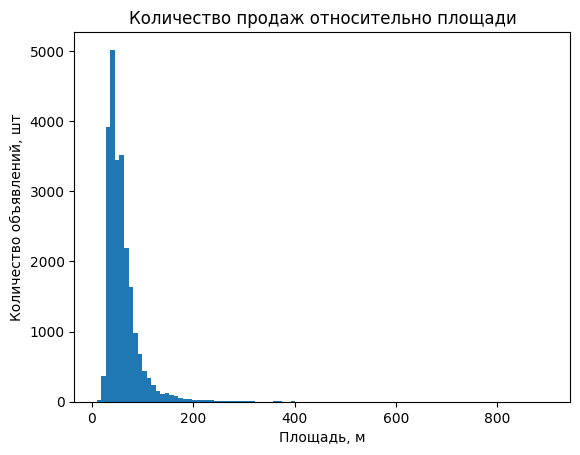

In [22]:
print(df['total_area'].describe())
(df['total_area']
 .plot(kind='hist', 
       bins=100,
       title='Количество продаж относительно площади',
       range=(10,900)))
plt.xlabel('Площадь, м')
plt.ylabel('Количество объявлений, шт')

Надо оценить значения, которые больше 120, потому что до 120 все в принципе логично и ничего странного нет - маленьких и больших квартир мало, серднего размера большинство. 

Text(0, 0.5, 'Количество объявлений, шт')

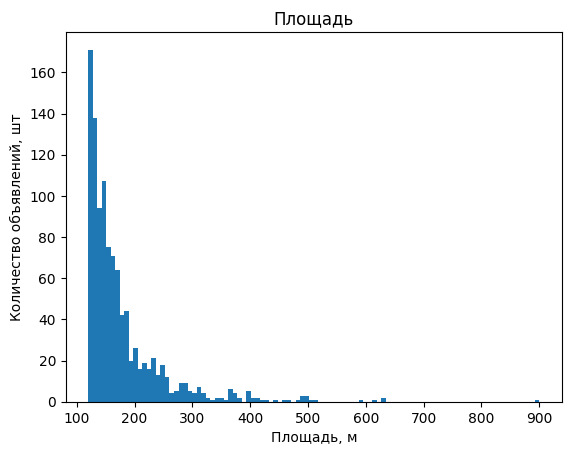

In [23]:
(df[df['total_area'] > 120]['total_area']
 .plot(kind='hist', 
       bins=100, 
       range=(120,900), 
       title='Площадь'))
plt.xlabel('Площадь, м')
plt.ylabel('Количество объявлений, шт')

In [24]:
print(df[df['total_area'] > 200]['total_area'].count())
df[df['total_area'] > 500]

227


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
3117,19,140000000,631.0,2019-03-30,7,-1000.00,5,-1000.0,5,unknown,False,False,60.0,0,Санкт-Петербург,25707,4972,0,-1000,2,210,-1000,221870.05,2019,3,5,last,4
4237,1,50000000,517.0,2017-10-14,7,-1000.00,4,332.0,3,unknown,False,False,22.0,0,Санкт-Петербург,22835,1847,2,477,2,540,-1000,96711.80,2017,10,5,other,1
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,unknown,False,False,100.0,0,Санкт-Петербург,24447,4666,1,767,0,-1000,14,110169.49,2019,2,3,other,4
8018,20,84000000,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,Санкт-Петербург,-1000,5735,2,110,0,-1000,1078,165680.47,2015,12,3,last,5
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,unknown,False,False,19.5,1,Санкт-Петербург,25707,4972,0,-1000,2,210,-1000,221799.75,2019,4,1,last,4
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,unknown,False,False,70.0,0,Санкт-Петербург,32440,5297,0,-1000,2,198,111,485436.89,2017,12,0,other,5
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,unknown,False,False,112.0,0,Санкт-Петербург,30706,7877,0,-1000,2,318,106,466666.67,2017,12,2,last,7


Недвижимость 120-500 при таком раскладе вопросов не вызывает, но этих значений не так много, относительного общей статистики, а на данные влияют сильно. С большой площадью двоякая ситуации - с первой они выглядят как вбросы их всего 200 штук, которые больше 200 и они сильно сдвигают среднюю, с другой стороны - удалять данные не хорошо, потому что они могут быть правдивыми (420млн за 900метров звучит, как ок), поэтому выводы буду делать по 0-200. 

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

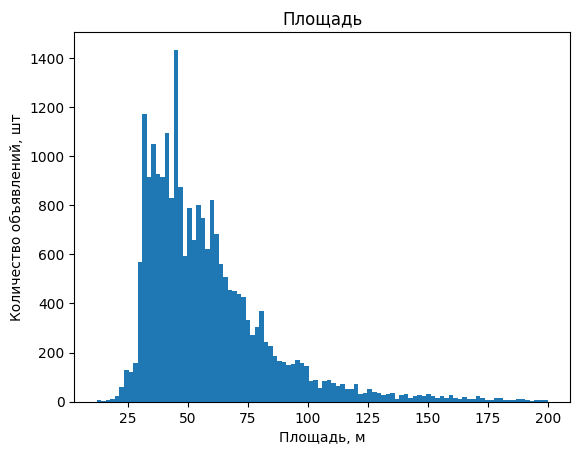

In [25]:
print(df[df['total_area']<200]['total_area'].describe())
(df['total_area']
 .plot(kind='hist', 
       bins=100, 
       range=(12,200), 
       title='Площадь'))
plt.xlabel('Площадь, м')
plt.ylabel('Количество объявлений, шт')

Другое дело - большего всего продаж у квартир площадью около 52 метров, чаще всего продаются квартиры от 40 до 68 метров. 

---


count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

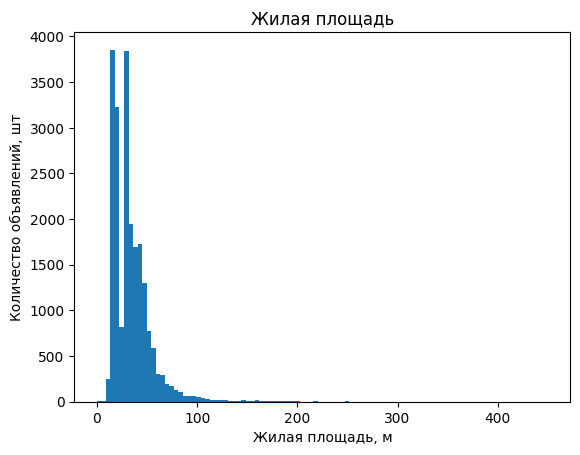

In [26]:
print(df[df['living_area']>0]['living_area'].describe())
(df[df['living_area']>0]['living_area']
.plot(kind='hist', 
       bins=100, 
       range=(0,450), 
       title='Жилая площадь'))
plt.xlabel('Жилая площадь, м')
plt.ylabel('Количество объявлений, шт')

Такая же ситуация, я бы рассмотрел квартиры до 100 метров живой площади

count    21433.000000
mean        32.608164
std         15.766555
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max         99.900000
Name: living_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

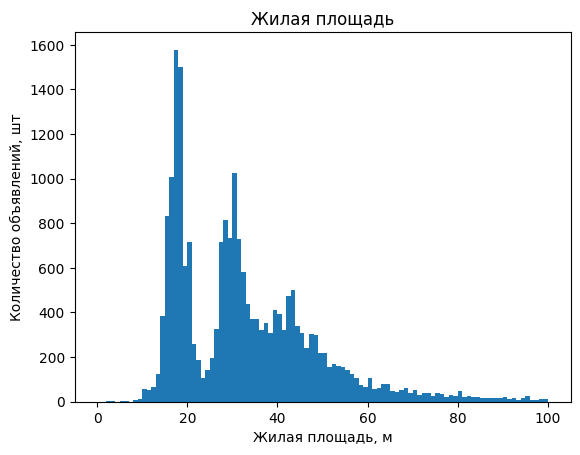

In [27]:
print(df[(df['living_area']>0)&(df['living_area']<100)]['living_area'].describe())
(df[(df['living_area']>0)&(df['living_area']<100)]['living_area']
.plot(kind='hist', 
       bins=100, 
       range=(0,100), 
       title='Жилая площадь'))
plt.xlabel('Жилая площадь, м')
plt.ylabel('Количество объявлений, шт')

In [28]:
print(df[(df['living_area']>15)&
         (df['living_area']<60)]
      .groupby('living_area')
      ['living_area'].count().sort_values(ascending=False).head(10))
(df[(df['living_area']>15)&
         (df['living_area']<60)]
      .groupby('living_area')
      ['living_area'].count().sort_values(ascending=False).tail(10))

living_area
18.0    882
17.0    675
30.0    598
16.0    486
20.0    481
28.0    423
31.0    381
19.0    329
32.0    320
29.0    319
Name: living_area, dtype: int64


living_area
29.599998    1
29.610000    1
29.670000    1
29.720000    1
29.740000    1
29.770000    1
29.810000    1
29.830000    1
29.840000    1
31.650000    1
Name: living_area, dtype: int64

Наблюдается несколько основных пиков популярной площади продаваемых квартир - около 17 метров, около 28 метров, около 43 метров. Большой провал около 30.

---


count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

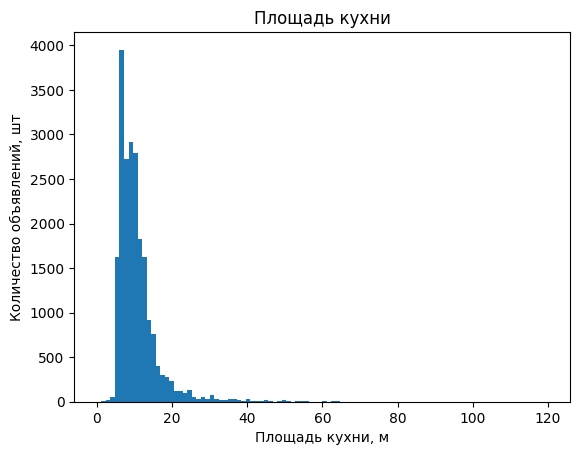

In [29]:
print(df[df['kitchen_area']>-1000]['kitchen_area'].describe())
(df[df['kitchen_area']>-1000]['kitchen_area']
.plot(kind='hist', 
       bins=100, 
       range=(0,120),
       title='Площадь кухни'))
plt.xlabel('Площадь кухни, м')
plt.ylabel('Количество объявлений, шт')

Такая же ситация - кухни больше 20 метров встречаются редко, а данные искажают, как и сверх маленькие (до условных 4 метров) какие-то выводы сделаю рассматривая интервал 4-20 метров

count    20233.000000
mean         9.535795
std          3.149160
min          4.000000
25%          7.000000
50%          9.000000
75%         11.110000
max         19.940000
Name: kitchen_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


kitchen_area
6.0     1300
10.0    1262
8.0     1110
9.0     1101
7.0     1062
11.0     797
12.0     662
8.5      415
5.5      400
14.0     381
Name: kitchen_area, dtype: int64

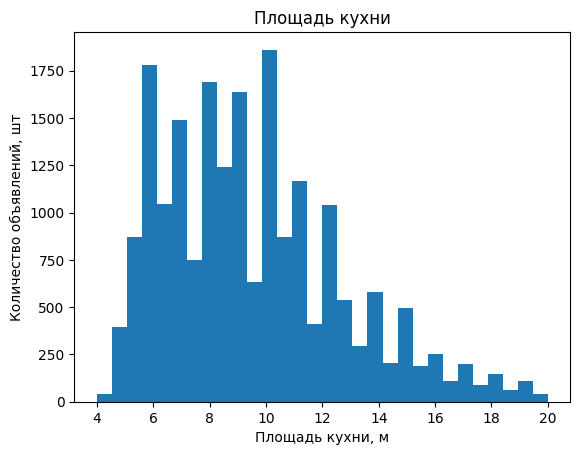

In [30]:
print(df[(df['kitchen_area']>=4) & (df['kitchen_area']<20)]['kitchen_area'].describe())

print(df[(df['kitchen_area']>=3) & (df['kitchen_area']<20)]['kitchen_area']
.plot(kind='hist', 
       bins=30, 
       range=(4,20), 
       title='Площадь кухни'))
plt.xlabel('Площадь кухни, м')
plt.ylabel('Количество объявлений, шт')

(df[(df['kitchen_area']>=4) & (df['kitchen_area']<20)]
 .groupby('kitchen_area')
 ['kitchen_area'].count().sort_values(ascending=False).head(10))


Пики по количеству продаж наблюдаются наблюдаются у квартир с площадью кухни - 6, 10 и 8 метров

----

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

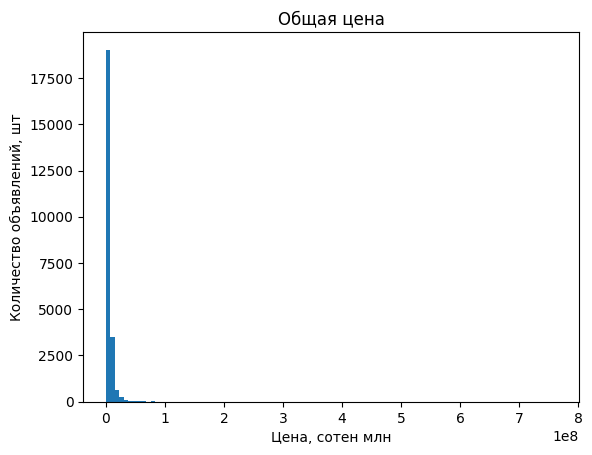

In [31]:
print(df[df['last_price']>-1000]['last_price'].describe())
(df[df['last_price']>-1000]['last_price']
.plot(kind='hist', 
       bins=100, 
       range=(12190,763000000),
       title='Общая цена'))

plt.xlabel('Цена, сотен млн')
plt.ylabel('Количество объявлений, шт')

Странные значения - слишком большие значения

count    3.700000e+01
mean     1.920268e+08
std      1.244244e+08
min      1.154900e+08
25%      1.300000e+08
50%      1.400000e+08
75%      1.908700e+08
max      7.630000e+08
Name: last_price, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

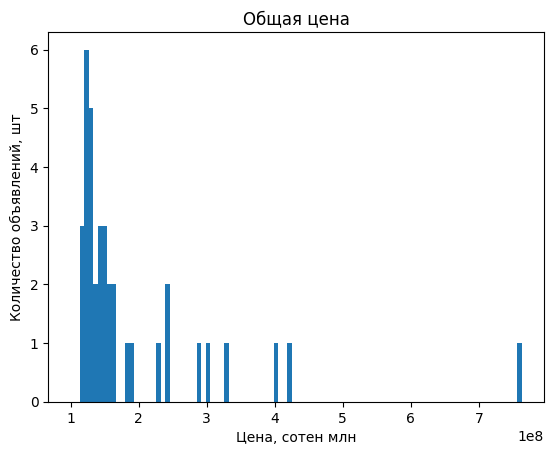

In [32]:
print(df[df['last_price']>100000000]['last_price'].describe())
(df[df['last_price']>-1000]['last_price']
.plot(kind='hist', 
       bins=100, 
       range=(100000000,763000000), 
       xlabel='Цена объекта',
       ylabel='Количество объявлений',
       title='Общая цена'))

plt.xlabel('Цена, сотен млн')
plt.ylabel('Количество объявлений, шт')

до 200 000 000 значения популярны, выше значения, я понимаю, что могут быть реальны, но это исключительные случаи, поэтому исключим их

Рассмотрим нормальный диапазон - от первой до третьей квартилии. 

Text(0, 0.5, 'Количество объявлений, шт')

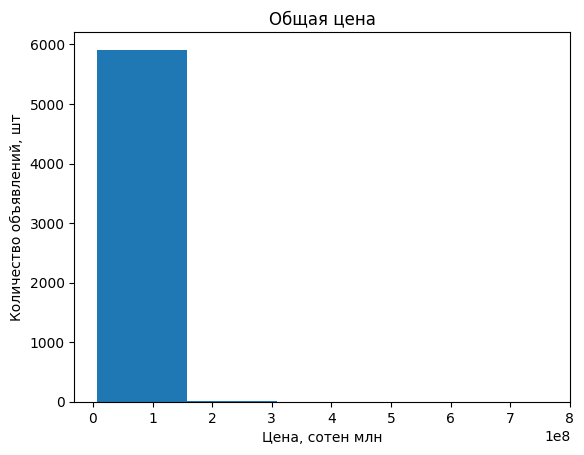

In [33]:
(df[df['last_price']>-1000]['last_price']
.plot(kind='hist', 
       bins=5, 
       range=(6800000,763000000),
       title='Общая цена'))

plt.xlabel('Цена, сотен млн')
plt.ylabel('Количество объявлений, шт')

In [34]:
df[df['last_price']>200000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,unknown,False,False,40.0,0,Санкт-Петербург,23011,1197,3,519,3,285,233,1736842.11,2018,4,2,other,1
5893,3,230000000,500.0,2017-05-31,6,-1000.00,7,-1000.0,7,unknown,False,False,40.0,0,Санкт-Петербург,32440,5297,0,-1000,2,198,50,460000.00,2017,5,2,last,5
12971,19,763000000,400.0,2017-09-30,7,-1000.00,10,250.0,10,unknown,False,False,-1000.0,2,Санкт-Петербург,25108,3956,1,530,3,756,33,1907500.00,2017,9,5,last,3
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,unknown,False,False,40.0,0,Санкт-Петербург,32440,5297,0,-1000,2,198,199,585365.85,2017,4,5,last,5
14706,15,401300000,401.0,2016-02-20,5,-1000.00,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912,2389,1,545,1,478,393,1000748.13,2016,2,5,last,2
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,unknown,False,False,70.0,0,Санкт-Петербург,32440,5297,0,-1000,2,198,111,485436.89,2017,12,0,other,5
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,unknown,False,False,29.8,0,Санкт-Петербург,33143,6235,3,400,3,140,249,857542.88,2017,4,0,other,6
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,unknown,False,False,112.0,0,Санкт-Петербург,30706,7877,0,-1000,2,318,106,466666.67,2017,12,2,last,7
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,unknown,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386,3,188,-1000,1542604.80,2019,3,1,last,1


Такие квартиры выглядят правдиво, поэтому я не могу их просто взять и исключить из выборки, но рассматривать их при общем анализе стоимости я не буду. 

In [35]:
df[(df['last_price']>-1000) & (df['last_price']<500000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
5698,7,450000,42.0,2017-07-31,2,-1000.00,1,23.0,1,unknown,False,False,5.8,0,поселок городского типа Будогощь,-1000,-1000,-1000,-1000,-1000,-1000,233,10714.29,2017,7,0,other,-1
6859,6,490000,40.0,2017-12-11,1,-1000.00,5,-1000.0,3,unknown,False,False,-1000.0,0,деревня Старополье,-1000,-1000,-1000,-1000,-1000,-1000,43,12250.00,2017,12,0,other,-1
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,unknown,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805,0,-1000,8,111.83,2019,3,2,last,9
9581,7,450000,43.4,2018-08-31,2,-1000.00,5,30.3,3,unknown,False,False,5.5,0,деревня Старополье,-1000,-1000,-1000,-1000,-1000,-1000,96,10368.66,2018,8,4,other,-1
10782,3,490000,29.1,2016-05-05,1,2.50,5,17.0,5,unknown,False,False,5.5,0,Сланцы,-1000,-1000,-1000,-1000,-1000,-1000,719,16838.49,2016,5,3,last,-1
14911,5,430000,54.0,2018-06-26,2,-1000.00,3,-1000.0,3,unknown,False,False,-1000.0,0,поселок станции Свирь,-1000,-1000,-1000,-1000,-1000,-1000,44,7962.96,2018,6,1,last,-1
16032,8,480000,32.0,2019-01-06,1,-1000.00,2,16.0,1,unknown,False,False,-1000.0,0,Сланцы,-1000,-1000,-1000,-1000,-1000,-1000,83,15000.00,2019,1,6,first,-1
16219,14,450000,38.5,2018-07-11,2,2.65,2,-1000.0,1,unknown,False,False,-1000.0,0,деревня Вахнова Кара,-1000,-1000,-1000,-1000,-1000,-1000,45,11688.31,2018,7,2,first,-1
16274,18,440000,40.0,2018-07-10,1,-1000.00,5,-1000.0,1,unknown,False,False,-1000.0,0,деревня Старополье,-1000,-1000,-1000,-1000,-1000,-1000,45,11000.00,2018,7,1,first,-1
17456,7,430000,30.4,2019-04-22,1,-1000.00,2,16.0,1,unknown,False,False,6.0,0,Сланцы,-1000,-1000,-1000,-1000,-1000,-1000,-1000,14144.74,2019,4,0,first,-1


Совсем дешевое жилье тоже похоже на правуду, нахоходится не в Питере, небольшая площадь, мало комнат. Для анализа не будем брать и такие данные, но и удалять их тоже не будем. 

Text(0, 0.5, 'Количество объявлений, шт')

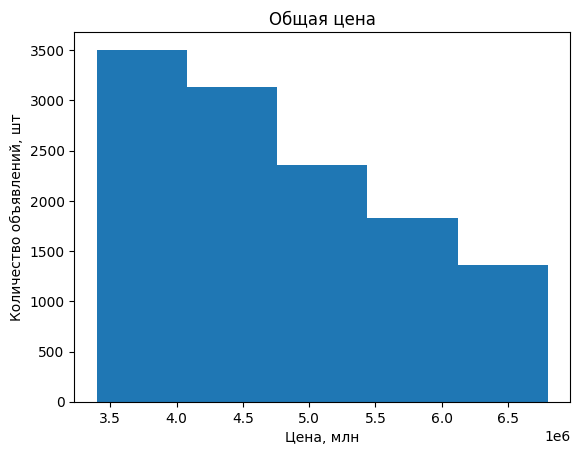

In [36]:
(df[df['last_price']>-1000]['last_price']
.plot(kind='hist', 
       bins=5, 
       range=(3.4e+06,6.8e+06),
       title='Общая цена'))

plt.xlabel('Цена, млн')
plt.ylabel('Количество объявлений, шт')

Когда данные подтверждают очевидное - это хорошо. Чем дороже недвижимость, тем тяжелее найти покупателя.

---

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

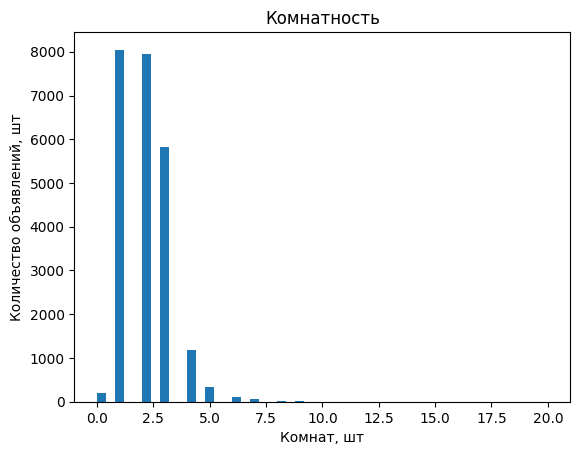

In [37]:
print(df[df['rooms']>-1000]['rooms'].describe())
(df[df['rooms']>-1000]['rooms']
.plot(kind='hist',
       bins=50, 
       range=(0,20), 
       title='Комнатность'))

plt.xlabel('Комнат, шт')
plt.ylabel('Количество объявлений, шт')

Самые популярные площади квартир от 1 до 3. Дальше, как и с площадью и с ценой - идет на спад. 

Есть предположение, что количество комнат равно 0, когда квартира либо студия, либо с открытой планировкой

In [38]:
df[df['rooms']==0].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
144,1,2450000,27.00,2017-03-30,0,-1000.00,24,15.50,2,unknown,True,False,-1000.0,2,поселок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,181,90740.74,2017,3,3,other,-1
349,4,2320000,25.00,2017-09-27,0,-1000.00,14,17.00,1,unknown,False,True,-1000.0,0,деревня Кудрово,-1000,-1000,-1000,-1000,-1000,-1000,45,92800.00,2017,9,2,first,-1
440,8,2480000,27.11,2018-03-12,0,-1000.00,17,24.75,4,unknown,True,False,-1000.0,2,Санкт-Петербург,38171,15015,0,-1000,2,982,64,91479.16,2018,3,0,other,15
508,0,3375000,34.40,2017-03-28,0,-1000.00,26,24.30,19,unknown,False,True,-1000.0,1,поселок Парголово,53115,19292,0,-1000,1,593,430,98110.47,2017,3,1,other,19
608,2,1850000,25.00,2019-02-20,0,-1000.00,10,-1000.00,7,unknown,True,False,-1000.0,0,поселок Шушары,-1000,-1000,-1000,-1000,-1000,-1000,29,74000.00,2019,2,2,other,-1
697,12,2500000,24.10,2017-12-01,0,2.75,25,17.50,21,unknown,True,False,-1000.0,0,деревня Кудрово,-1000,-1000,-1000,-1000,-1000,-1000,201,103734.44,2017,12,4,other,-1
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,unknown,True,False,-1000.0,0,поселок Шушары,18654,29846,0,-1000,0,-1000,40,88235.29,2017,6,2,first,29
780,9,2600000,26.10,2018-02-20,0,-1000.00,18,-1000.00,8,unknown,False,True,-1000.0,1,поселок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,45,99616.86,2018,2,1,other,-1
839,14,1900000,35.00,2017-04-14,0,2.70,5,15.00,3,False,False,True,-1000.0,1,поселок Новый Свет,-1000,-1000,-1000,-1000,-1000,-1000,7,54285.71,2017,4,4,other,-1
946,5,2200000,23.00,2016-09-27,0,-1000.00,27,18.00,7,unknown,False,True,-1000.0,2,поселок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,483,95652.17,2016,9,1,other,-1


In [39]:
print(df[df['rooms']==0]['rooms'].count())
df[(df['rooms']==0)&((df['studio']==True)|(df['open_plan']==True))]['rooms'].count()

197


np.int64(197)

Очевидно предположение, окозалось верным, значит комнаты 0 штук - это не ошибка.

---

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

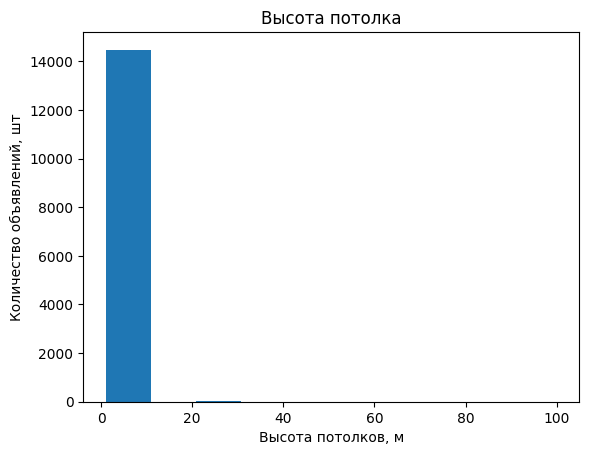

In [40]:
print(df[df['ceiling_height']>-1000]['ceiling_height'].describe())
(df[df['ceiling_height']>-1000]['ceiling_height']
.plot(kind='hist',
       bins=10, 
       range=(1,100),
       title='Высота потолка'))

plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт')

Для меня конечно, кажутся странными потолки выше метров 10, но предположение, высказанное в теории к заданию, что "Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м." - лично мне кажется притянутым зауши и выглядит, как "подгонометрия". Такими способами можно любые значения превращять в другие и находить разумные аргументы. Понимаю, что если выше 10 метров больше половина датасета, то скорее всего так и должно быть и я могу обрабоать данные, как сказано в теории, но в дальнейшей работе, наверное не прибигал бы к такому методу. (оставьте пожалуйста комментарий на это, как эксперт из данной сферы, спасибо!)

In [41]:
df[df['ceiling_height']>10]['ceiling_height'].count()

np.int64(25)

In [42]:
df[df['ceiling_height']>10].sort_values('ceiling_height',ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19,600000.00,2018,7,2,last,8
22336,19,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838,3506,0,-1000,3,511,-1000,108214.29,2019,4,4,other,3
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,unknown,False,False,8.0,0,Волхов,-1000,-1000,-1000,-1000,-1000,-1000,-1000,38666.67,2018,11,0,other,-1
21377,19,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742,9760,0,-1000,0,-1000,61,116666.67,2017,4,1,other,9
22938,14,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,True,False,False,9.0,1,деревня Нижняя,-1000,-1000,-1000,-1000,-1000,-1000,27,40816.33,2018,3,3,last,-1
17857,1,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,-1000.0,0,Санкт-Петербург,41030,15543,0,-1000,0,-1000,73,69642.86,2017,12,4,other,15
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,unknown,False,True,-1000.0,2,поселок Мурино,-1000,-1000,-1000,-1000,-1000,-1000,28,120000.00,2017,9,2,other,-1
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,unknown,False,False,9.0,2,деревня Мины,-1000,-1000,-1000,-1000,-1000,-1000,540,46296.30,2017,10,4,other,-1
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,unknown,False,False,12.0,5,Санкт-Петербург,18732,20444,0,-1000,3,80,38,101875.00,2019,1,2,other,20
21824,20,2450000,44.0,2019-02-12,2,27.0,2,38.0,2,False,False,False,8.6,2,поселок городского типа Большая Ижора,-1000,-1000,-1000,-1000,-1000,-1000,-1000,55681.82,2019,2,1,last,-1


Мне совесть не позволяет доверять этим данным. 100-метровые аппартаменты на послденем этаже могут быть и 10-метровым пентхаусом и однометровым чердаком, поэтому прибегну к удалению этих строх.

In [43]:
df.drop(df[df['ceiling_height']>10].index, inplace=True)

Теперь посмотрим 

count    14479.00000
mean         2.72798
std          0.29322
min          1.00000
25%          2.51000
50%          2.65000
75%          2.80000
max          8.30000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

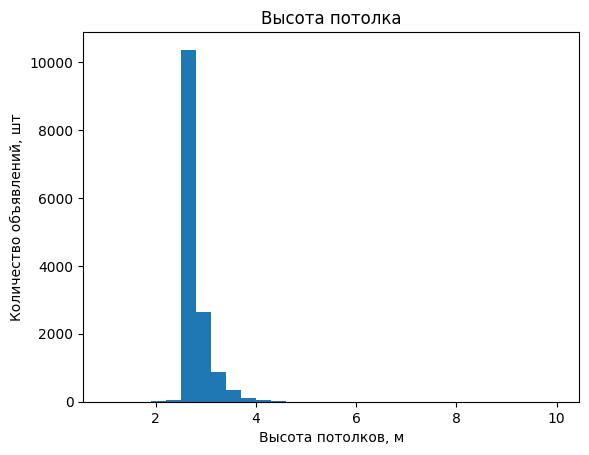

In [44]:
print(df[df['ceiling_height']>-1000]['ceiling_height'].describe())
(df[df['ceiling_height']>-1000]['ceiling_height']
.plot(kind='hist',
       bins=30, 
       range=(1,10),
       title='Высота потолка'))

plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт')

Правдоподбно - самые популярные квартиры с высотой 2,65. В целом продаются лучше всех квартиры с высотой от 2.65 до 2.8. 

---

<Axes: title={'center': 'Тип этажа'}, ylabel='Количество объявлений'>

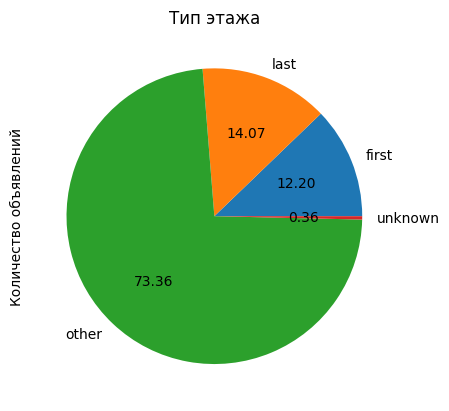

In [45]:
(df.groupby('floor_type')['floor_type'].count()
 .plot(kind='pie', 
       ylabel='Количество объявлений',
       title='Тип этажа',
      autopct='%.2f'))

Первый и последний этаж встречается примерно одинаково, пропущенных значений не так много, возможно просто не указывали сколько этажей всего в доме. Больше всего этажей - которые не первый и не последний (или в одноэтажном доме, их я тоже отнес к другим).

---

count    18164.000000
mean     14191.732052
std       8606.577952
min        181.000000
25%       9238.000000
50%      13100.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

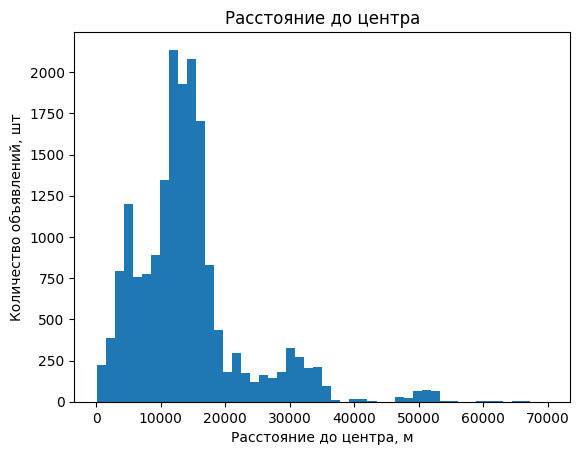

In [46]:
print(df[df['city_centers_nearest']>-1000]['city_centers_nearest'].describe())
(df[df['city_centers_nearest']>-1000]['city_centers_nearest']
.plot(kind='hist',
       bins=50, 
       range=(100,70000), 
       title='Расстояние до центра'))

plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество объявлений, шт')

Наблюдаются правдоподобные пики - около 5000 метров и 15000 метров. Такие квартиры покупают больше всего. Могу предположить, что это самые доступные варианты по цене и близости. Меньше 5000 дорого, дальше 15000 далеко ехать. Странный пик около 50000. 

In [47]:
df[df['city_centers_nearest']>45000].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km
11,9,3300000,44.0,2018-08-27,2,-1000.00,5,31.0,4,False,False,False,6.0,1,Ломоносов,48252,51677,0,-1000,0,-1000,7,75000.00,2018,8,0,other,51
67,6,2550000,31.0,2018-08-28,1,2.50,5,15.4,4,unknown,False,False,7.2,0,Ломоносов,47675,51100,0,-1000,2,490,39,82258.06,2018,8,1,other,51
72,10,4500000,55.0,2018-12-09,2,2.70,3,35.5,2,unknown,False,False,7.5,1,Кронштадт,68258,49984,3,167,3,118,141,81818.18,2018,12,6,other,49
120,11,2500000,30.9,2017-10-20,1,2.75,5,16.7,1,unknown,False,False,6.0,0,Кронштадт,68997,50722,1,285,2,221,360,80906.15,2017,10,4,first,50
128,6,2500000,31.0,2019-02-13,1,2.75,3,19.5,1,unknown,False,False,5.0,0,Ломоносов,48649,52073,0,-1000,2,896,35,80645.16,2019,2,2,first,52
132,13,2699000,33.0,2017-10-13,1,2.50,9,19.0,7,unknown,False,False,6.0,0,Петергоф,45332,48757,0,-1000,0,-1000,49,81787.88,2017,10,4,other,48
200,13,9150000,98.3,2018-06-30,3,2.84,13,60.3,11,unknown,False,False,12.5,1,Ломоносов,48910,52334,0,-1000,2,582,271,93082.40,2018,6,5,other,52
204,1,3600000,44.2,2018-01-12,2,2.50,9,27.0,3,unknown,False,False,6.3,2,Ломоносов,46926,50351,0,-1000,1,590,24,81447.96,2018,1,4,other,50
302,6,3500000,31.0,2016-04-05,1,2.55,5,17.5,1,unknown,False,False,5.4,0,Зеленогорск,72005,53104,3,92,1,571,168,112903.23,2016,4,1,first,53
376,18,8400000,84.0,2018-06-26,2,2.75,3,41.0,1,unknown,False,False,13.0,0,Зеленогорск,73827,54926,0,-1000,0,-1000,201,100000.00,2018,6,1,first,54


Тут можно сделать несколько предположений, во первых не правильно введы данные, может расстояние в см. Второе, к которому склоняюсь я,что расстояние по ошибке рассчитывалось до другого населенного пункта. 

Рассмотрим более правдоподбные данные

count    16829.000000
mean     12419.610434
std       5694.810961
min        181.000000
25%       8656.000000
50%      12622.000000
75%      15561.000000
max      29988.000000
Name: city_centers_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

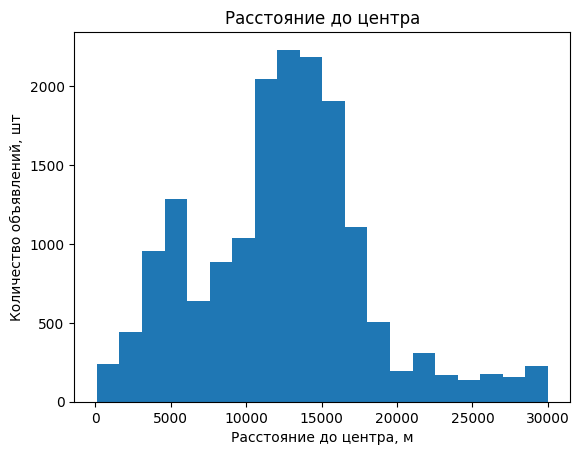

In [48]:
print(df[(df['city_centers_nearest']>-1000) & (df['city_centers_nearest']<30000)]['city_centers_nearest'].describe())
(df[df['city_centers_nearest']>-1000]['city_centers_nearest']
.plot(kind='hist',
       bins=20, 
       range=(100,30000), 
       title='Расстояние до центра'))


plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество объявлений, шт')

Самые частые продажи у квартир на расстоянии от 8600 метров до 15500 метров, а также около 4000-5000 метров. 

---


count    8071.000000
mean      490.802007
std       342.418839
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

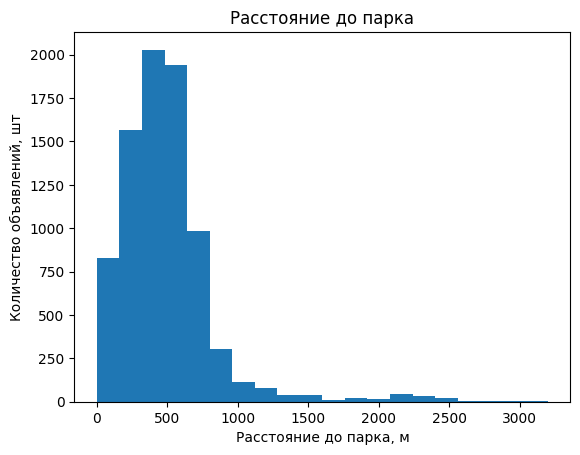

In [49]:
print(df[df['parks_nearest']>-1000]['parks_nearest'].describe())
(df[df['parks_nearest']>-1000]['parks_nearest']
.plot(kind='hist',
       bins=20, 
       range=(1,3200), 
       title='Расстояние до парка'))


plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество объявлений, шт')

Дальше 1000 метров не такое большое количество продаж, изучим без них

count    7694.000000
mean      435.424227
std       209.621900
min         1.000000
25%       280.000000
50%       441.000000
75%       587.000000
max       997.000000
Name: parks_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений, шт')

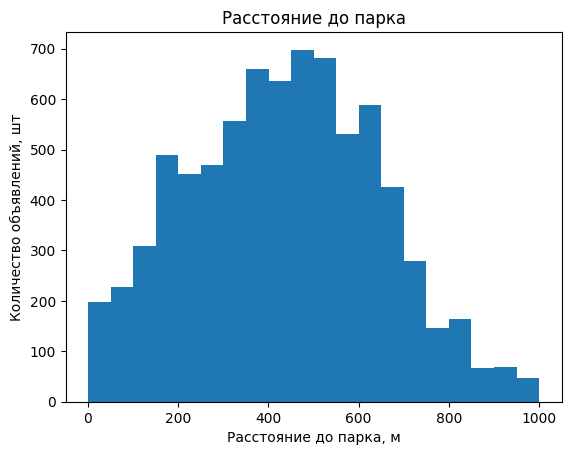

In [50]:
print(df[(df['parks_nearest']>-1000)&(df['parks_nearest']<1000)]['parks_nearest'].describe())
(df[df['parks_nearest']>-1000]['parks_nearest']
.plot(kind='hist',
       bins=20, 
       range=(1,1000), 
       title='Расстояние до парка'))

plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество объявлений, шт')

Судя по мнению покупателей - оптимальное расстоение от парка до квартиры от 280 до 587 метров. 

---

<font color='blue'>Вывод по работе в разделе 4.1:  </font> Обработали основые параметры. По каждому определили "эталонные" для продажи характеристики.

---

#### Изучение скорости продажи квартиры 

In [51]:
df[df['days_exposition']==-1000]['days_exposition'].count()

np.int64(3175)

3175 пропущенных значений скорее всего означает, что объект еще не продан. 

In [52]:
print(df[df['days_exposition']>-1000]['days_exposition'].describe())

count    20499.000000
mean       180.923265
std        219.778573
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


В среднем объекты недвижимости продают от 45 до 232 дней. Самая быстрая продажа произошла за 1 день. Самая долгая за 1580.

Text(0, 0.5, 'Количество объявлений, шт')

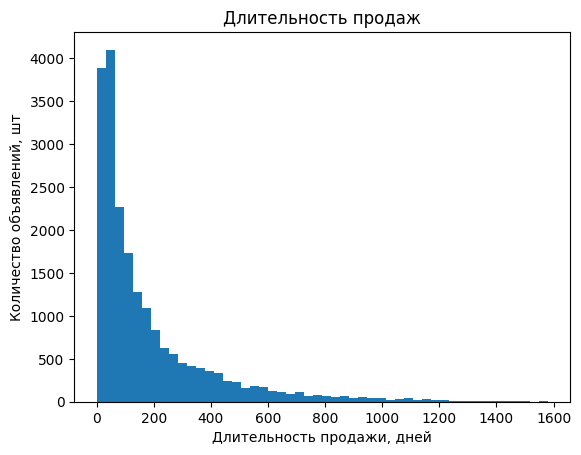

In [53]:
(df[df['days_exposition']>-1000]['days_exposition']
    .plot(
          kind='hist',
          bins=50, 
          range=(1,1580),
          title='Длительность продаж'))


plt.xlabel('Длительность продажи, дней')
plt.ylabel('Количество объявлений, шт')

Рассмотрим поближе значения до 200 и после 1000. 

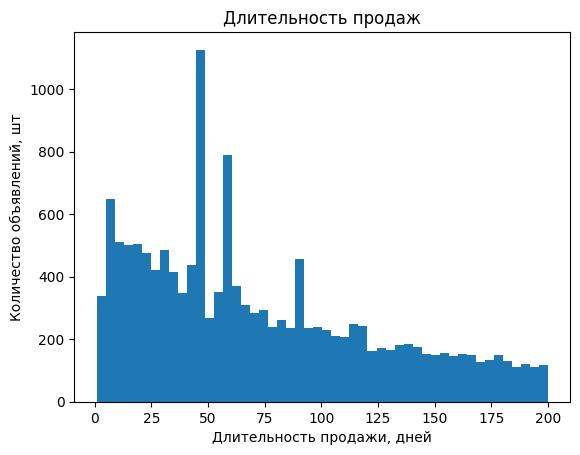

Text(0, 0.5, 'Количество объявлений, шт')

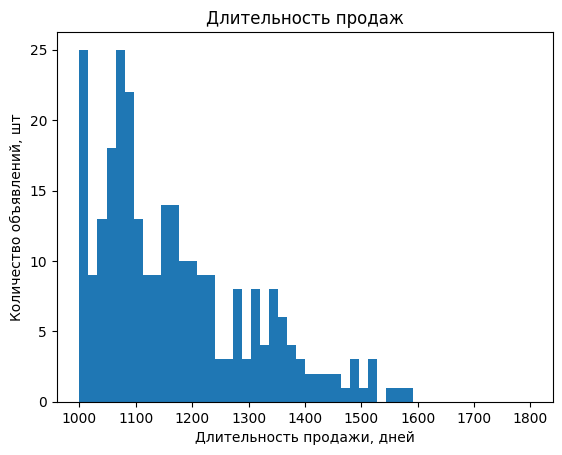

In [54]:
(df[df['days_exposition']>-1000]['days_exposition']
    .plot(
          kind='hist',
          bins=50, 
          range=(1,200),
          title='Длительность продаж'))


plt.xlabel('Длительность продажи, дней')
plt.ylabel('Количество объявлений, шт')
plt.show()
(df[df['days_exposition']>-1000]['days_exposition']
    .plot(
          kind='hist',
          bins=50, 
          range=(1000,1800),
          title='Длительность продаж'))


plt.xlabel('Длительность продажи, дней')
plt.ylabel('Количество объявлений, шт')

Большое количество объявлений продавалось быстрее, чем за 50 дней.
Исключая редкие случаи - долгими, но встречающиемися, можно назвать в срок от 1400 дней - почти 4 года...

Можно сказать, что абсолютное большиство объектов продается быстрее, чем за 200 дней.

In [55]:
print((df[df['days_exposition']>-1000]
 .groupby('days_exposition')['days_exposition'].count()
 .sort_values(ascending=False).head(10)))

(df[df['days_exposition']>-1000]
 .groupby('days_exposition')['days_exposition'].count()
 .sort_values(ascending=True).head(10))

days_exposition
45    880
60    538
7     233
30    208
90    204
4     176
3     158
5     152
14    148
9     143
Name: days_exposition, dtype: int64


days_exposition
1      1
978    1
976    1
975    1
971    1
969    1
964    1
963    1
957    1
955    1
Name: days_exposition, dtype: int64

Получили "топ" и "анти-топ" дней по скорости продажи. Чаще всего продавали за 45, 60 и 7 дней. Реже всего за количество дней около 950-980.

---

<font color='blue'>Вывод по работе в разделе 4.2:  </font> Изучили скорость продажи. Нашли самую быструю и самую долгую продажу (1 день и 1580). Определилил среднюю скорость продажи - от 45 до 232 дней. Нашли топ быстрых и медленных продаж. В общем можно сказать, что объект недвидимости с высокой вероятностью получится продать за полгода. 
Быстрыми можно назвать продажи за срок меньше 50 дней - это самые часто встречаемый срок продажи. Дольше 1400 дней продавались редко, ведь 4 года - это очень долго. 

---

#### Факторы влияющие на стоимость объекта

 Рассмотрим такие факторы, как значение общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

Параметр "этажа, на котором расположена квартира (первый, последний, другой)" рассмотрим отдельно, потому что другой формат данных


In [56]:
category = ['last_price','total_area', 'living_area','kitchen_area', 'rooms', 'day', 'month', 'year']
(df.pivot_table(index='floor',
                values=category)).corr()

,day,kitchen_area,last_price,living_area,month,rooms,total_area,year
day,1.000000,0.666864,0.323538,0.591176,0.268843,-0.060125,0.320693,0.181430
kitchen_area,0.666864,1.000000,0.015222,0.811360,0.053986,0.355742,0.425760,0.150095
last_price,0.323538,0.015222,1.000000,0.232902,-0.019230,0.442479,0.738956,-0.051814
living_area,0.591176,0.811360,0.232902,1.000000,0.023488,0.398868,0.548400,0.180769
month,0.268843,0.053986,-0.019230,0.023488,1.000000,-0.289971,-0.057077,-0.355896
rooms,-0.060125,0.355742,0.442479,0.398868,-0.289971,1.000000,0.811644,-0.046619
total_area,0.320693,0.425760,0.738956,0.548400,-0.057077,0.811644,1.000000,-0.091456
year,0.181430,0.150095,-0.051814,0.180769,-0.355896,-0.046619,-0.091456,1.000000


Можно сказать, что сильное влияние цены только от общей площади.

----

Теперь рассмотрим каждый параметр отдельно. 

<Axes: title={'center': 'Влияние дня на цену'}, xlabel='День недели', ylabel='Цена, млн'>

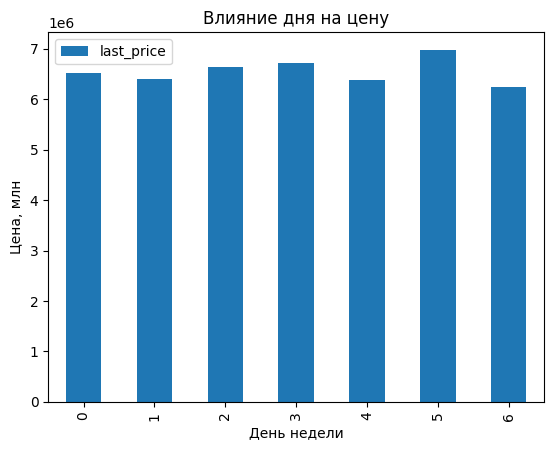

In [57]:
(df.pivot_table(index='day',
                values='last_price')
                .plot(kind='bar',
                    title='Влияние дня на цену',
                    ylabel='Цена, млн',
                    xlabel='День недели'))

Разница если и есть, то минимальная. Посмотрим поближе к верху. 

(6000000.0, 7000000.0)

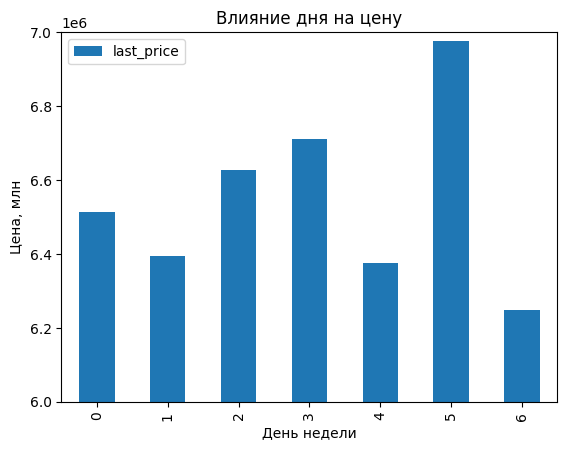

In [58]:
(df.pivot_table(index='day',
                values='last_price')
                .plot(kind='bar',
                    title='Влияние дня на цену',
                    ylabel='Цена, млн',
                    xlabel='День недели'))
plt.ylim(6e6,7e6)

Дороже всего продавались квартиры, выставленные в 5 день - субботу. 

---

<Axes: title={'center': 'Влияние площади кухни на цену'}, xlabel='Площадь кухни', ylabel='Цена, сотни млн'>

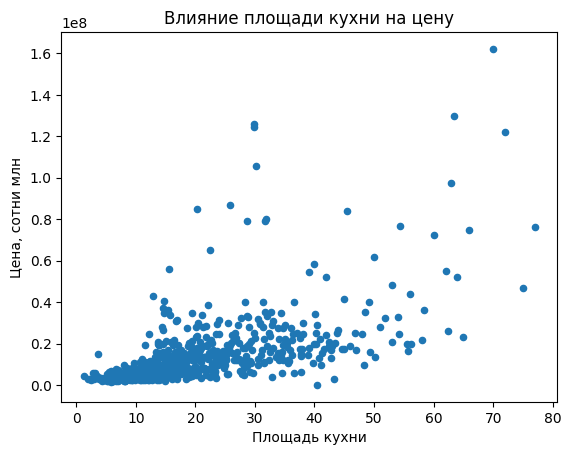

In [59]:
(df[(df['kitchen_area']!=-1000)&(df['kitchen_area']<80)].pivot_table(index='kitchen_area',
            values='last_price').reset_index()
            .plot(x='kitchen_area', y='last_price', kind='scatter',
                title='Влияние площади кухни на цену',
                ylabel='Цена, сотни млн',
                xlabel='Площадь кухни'))

Основное скопление - до 30 квадратных метров, с ценами ниже 40 000 000. 

(0.0, 40000000.0)

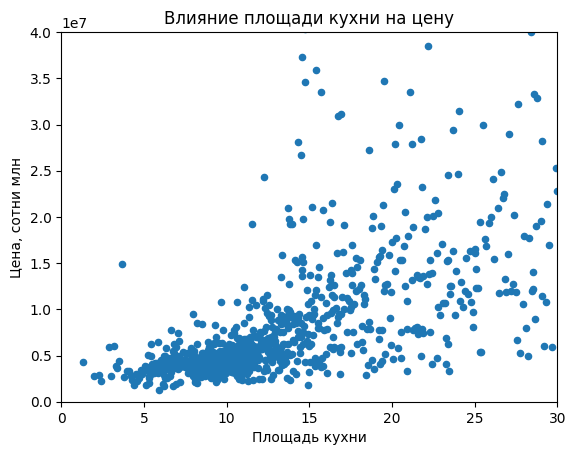

In [60]:
(df[(df['kitchen_area']!=-1000)&(df['kitchen_area']<80)].pivot_table(index='kitchen_area',
            values='last_price').reset_index()
            .plot(x='kitchen_area', y='last_price', kind='scatter',
                title='Влияние площади кухни на цену',
                ylabel='Цена, сотни млн',
                xlabel='Площадь кухни'))
plt.xlim(0,30)
plt.ylim(0,4e7)

Ну заметно распределение очень хаотичное и нет особой закономерности, даже исключая выбросы. 

---

<Axes: title={'center': 'Влияние жилой площади на цену'}, xlabel='Жилая площадь, м', ylabel='Цена, сотни млн'>

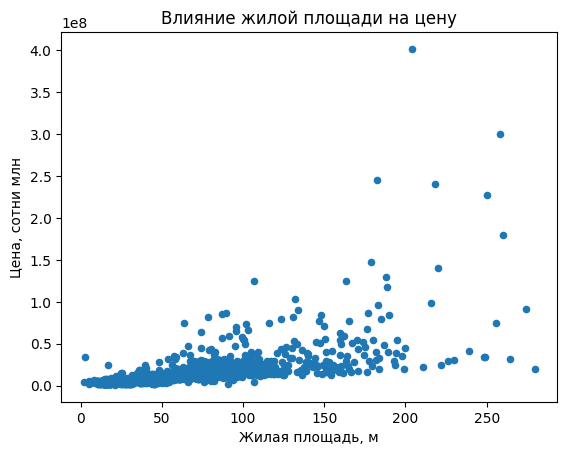

In [61]:
(df[(df['living_area']!=-1000) & (df['living_area']<300)]
 .pivot_table(index='living_area',values='last_price').reset_index()
 .plot(x='living_area', y='last_price', kind='scatter',
        title='Влияние жилой площади на цену',
        ylabel='Цена, сотни млн',
        xlabel='Жилая площадь, м'))

Очень интересно, ничего не понятно,уберем вбросы

(0.0, 50000000.0)

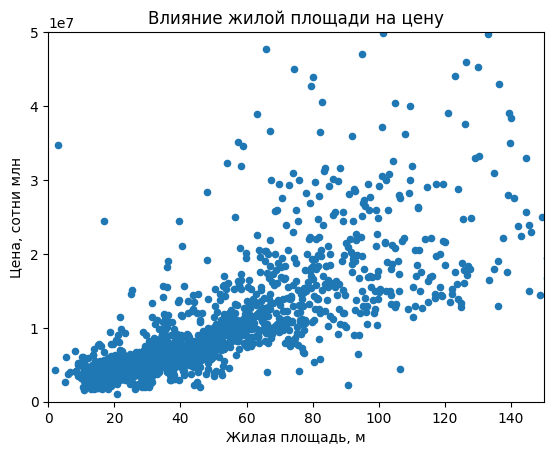

In [62]:
(df[(df['living_area']!=-1000) & (df['living_area']<300)]
 .pivot_table(index='living_area',values='last_price').reset_index()
 .plot(x='living_area', y='last_price', kind='scatter',
        title='Влияние жилой площади на цену',
        ylabel='Цена, сотни млн',
        xlabel='Жилая площадь, м'))
plt.xlim(0,150)
plt.ylim(0,5e7)

Общая тенденция заметна, но тоже не ярко выражена. Значения так же с большими разбросом. 

---

<Axes: title={'center': 'Влияние месяца на цену'}, xlabel='Месяц', ylabel='Цена, млн'>

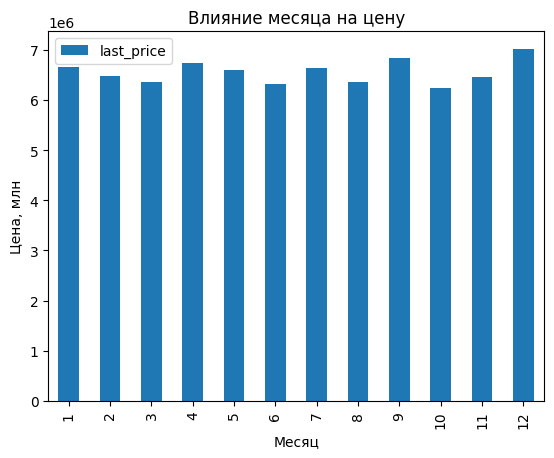

In [63]:
(df[(df['month']!= 'unknown')].pivot_table(index='month',
            values='last_price')
            .plot(kind='bar',
                title='Влияние месяца на цену',
                ylabel='Цена, млн',
                xlabel='Месяц'))

Объявлдения опубликованные в марте, июне, августе и октябре были с более низкой ценой. Самые высокие цена на объявлениях, опубликованных в декабре. 

---

<Axes: title={'center': 'Влияние кол-ва комнат на цену'}, xlabel='Кол-во комнат, шт', ylabel='Цена, сотен млн'>

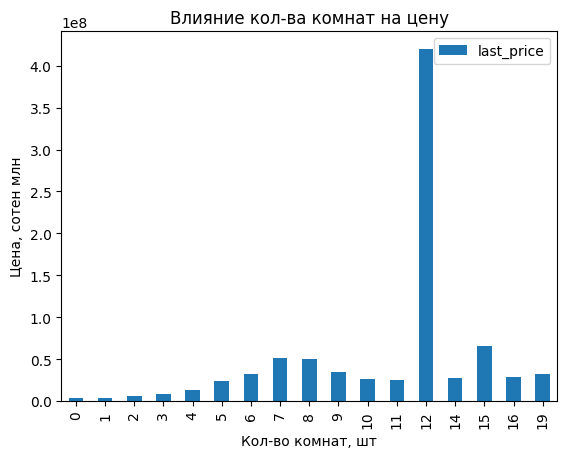

In [64]:
(df[(df['rooms']!= -1000) ].pivot_table(index='rooms',
            values='last_price')
            .plot(kind='bar',
                title='Влияние кол-ва комнат на цену',
                ylabel='Цена, сотен млн',
                xlabel='Кол-во комнат, шт'))

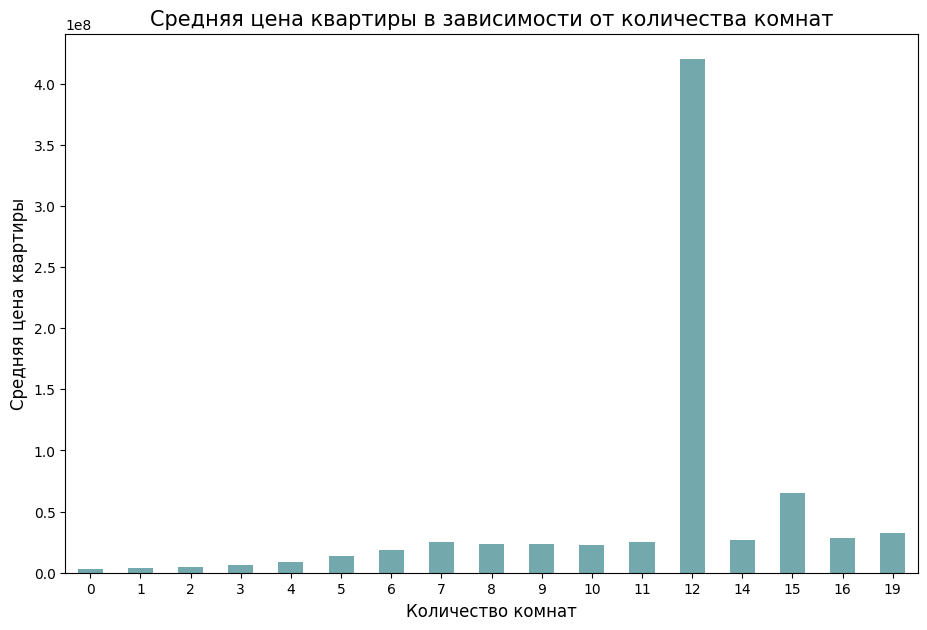

In [65]:
df.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от количества комнат', size=15)
plt.xlabel('Количество комнат', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

Очевидный вброс, его не будем учитывать при анализе

<Axes: title={'center': 'Влияние кол-ва комнат на цену'}, xlabel='Кол-во комнат', ylabel='Цена, десятки млн'>

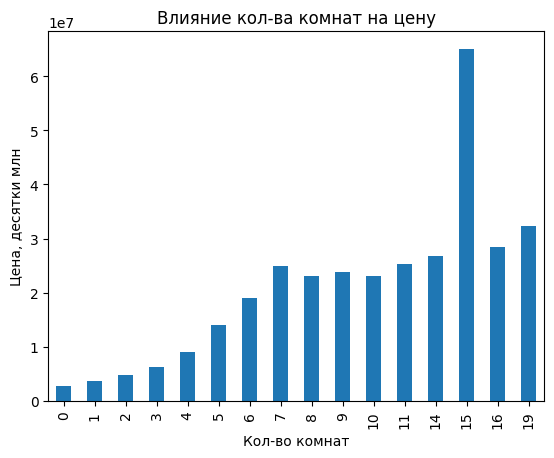

In [66]:
(df[(df['rooms']!= -1000)&(df['rooms']!=12) ].groupby('rooms')
            ['last_price'].median()
            .plot(kind='bar',
                title='Влияние кол-ва комнат на цену',
                ylabel='Цена, десятки млн',
                xlabel='Кол-во комнат'))

Явно на цену влияет  какой-то третий фактор. До 7 комнат - каждая комната влияет на цену, уверен, что там высокая корреляция. Потом происходит спад и опять рост (15 скорее всего единичный вброс). Проверим корреляцию цены от кол-ва комнат до 7.  

In [67]:
df[(df['rooms']>-1000)&(df['rooms']<7)]['rooms'].corr(df[(df['rooms']> -1000)&(df['rooms']<7)]['last_price'])

np.float64(0.36742494485337296)

Честно говоря, удивлен. Но нельзя предугадать все и вся. Видимо, есть третий фактор. Бывает, ну ладно. 

---

<Axes: title={'center': 'Влияние общей площади на цену'}, xlabel='Общая площадь', ylabel='Цена, сотни млн'>

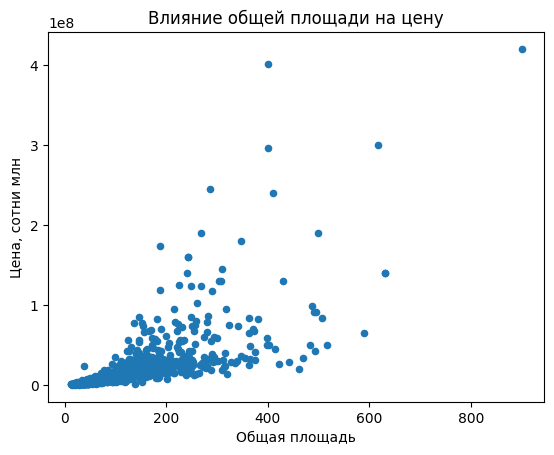

In [68]:
(df.pivot_table(index='total_area',
            values='last_price').reset_index()
            .plot(x='total_area', y='last_price', kind='scatter',
                title='Влияние общей площади на цену',
                ylabel='Цена, сотни млн',
                xlabel='Общая площадь'))

Оценим до 200...

(0.0, 25000000.0)

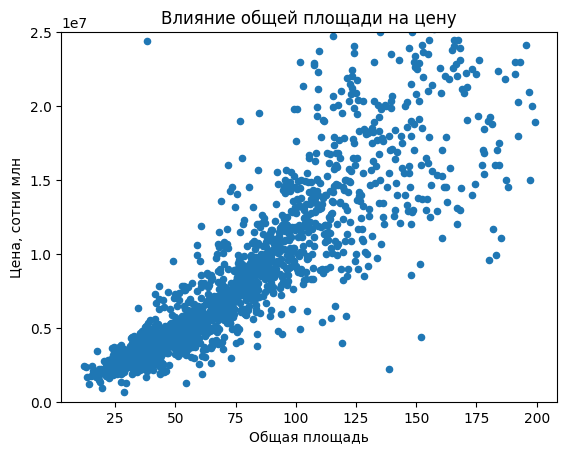

In [69]:
(df[(df['total_area']<200)].pivot_table(index='total_area',
            values='last_price').reset_index()
            .plot(x='total_area', y='last_price', kind='scatter',
                title='Влияние общей площади на цену',
                ylabel='Цена, сотни млн',
                xlabel='Общая площадь'))
plt.ylim(0,25000000)

Тут видна общая логичная тенденция - больше площадь - дороже квартира. Я бы сказал, что зависимость очевидна и логически, и судя по полученным результатам.  

---

<Axes: title={'center': 'Влияние года публикации на цену'}, xlabel='Год публикации', ylabel='Цена, десятки млн'>

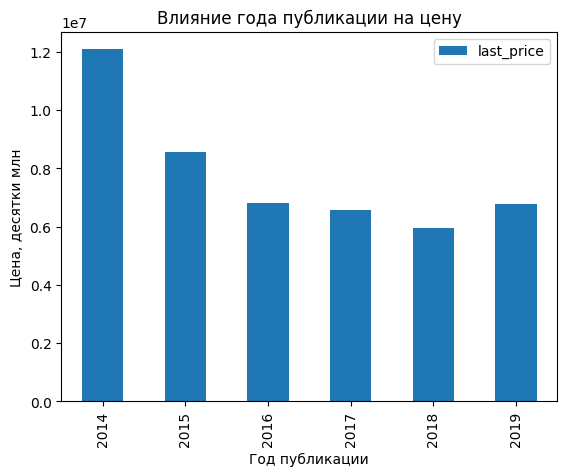

In [70]:
(df[(df['year']!= -1000) ].pivot_table(index='year',
            values='last_price')
            .plot(kind='bar',
                title='Влияние года публикации на цену',
                ylabel='Цена, десятки млн',
                xlabel='Год публикации'))

С 2014 до 2018 года квартиры дешевели, потом начался рост. Зависимость есть. 

---

Для анализа влияния типа этажа на цену поделим недвижимость на категории дешевая, средняя и дорогая.

In [71]:
df['last_price'].describe()

count    2.367400e+04
mean     6.543263e+06
std      1.089224e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Сверхдешевая < 500 000, дешевая будет >500 000 и <3 400 000, средняя 3 400 000 - 6 800 000, дорогая 6 800 000 - 20 000 000, сверхдорогая больше 20 000 000

In [72]:
def t_price(x):
    if x <= 500000:
        return 'super_poor'
    if (x > 500000) and (x <= 3400000):
        return 'poor'
    if  (3400000 < x) and (x <= 6800000):
        return 'medium'
    if (x > 6800000) and (x <= 20000000):
        return 'rich'
    if x> 20000000:
        return 'super_rich'


df['type_price'] = df['last_price'].apply(t_price)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km,type_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknown,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,-1000,120370.37,2019,3,3,other,16,rich
1,7,3350000,40.4,2018-12-04,1,-1000.00,11,18.6,1,unknown,False,False,11.0,2,поселок Шушары,12817,18603,0,-1000,0,-1000,81,82920.79,2018,12,1,first,18,poor
2,10,5196000,56.0,2015-08-20,2,-1000.00,5,34.3,4,unknown,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.71,2015,8,3,other,13,medium
3,0,64900000,159.0,2015-07-24,3,-1000.00,14,-1000.0,9,unknown,False,False,-1000.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.10,2015,7,4,other,6,super_rich
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknown,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00,2018,6,1,other,8,rich


In [73]:
df.groupby('type_price')['type_price'].count()

type_price
medium        11942
poor           5902
rich           5105
super_poor       18
super_rich      707
Name: type_price, dtype: int64

Все правильно - среднего класса большинство, беднее и богатых поровну примерно, а нищих и очень богатых совсем чуть-чуть

<Axes: title={'center': 'Зависимость класса цены на количество сделок'}, xlabel='Класс цены', ylabel='Количество сделок'>

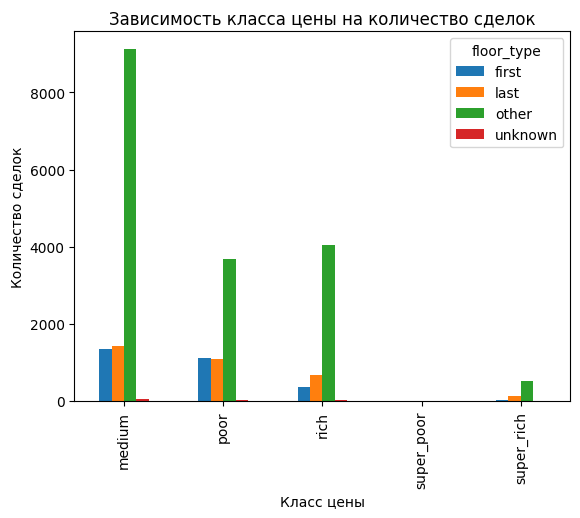

In [74]:
(pd.crosstab(df['type_price'], df['floor_type'])
 .plot(kind='bar', xlabel='Класс цены', 
       ylabel='Количество сделок', 
       title='Зависимость класса цены на количество сделок'))

Таким образом получили своего рода топ - во всех нормальных (бедные, средние, богатые) категориях лидируют этажи 'другие', потом идут послдение этажи у среднего класса 

---

<font color='blue'>Вывод по работе в разделе 4.3:  </font> Рассмотрели каждый параметр, который может влиять на конечную цену. Судя по корреляции - самое большое значение у общей площади. При анализе каждого параметра в отдельности наблюдается зависимость цены от - дня, месяца и года публикации, также роль играет количество комнат. 

---

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [75]:
top = df['locality_name'].value_counts().head(10).reset_index()
top.columns = ['locality_name', 'count']
top

,locality_name,count
0,Санкт-Петербург,15706
1,поселок Мурино,554
2,поселок Шушары,440
3,Всеволожск,398
4,Пушкин,369
5,Колпино,338
6,поселок Парголово,327
7,Гатчина,306
8,деревня Кудрово,299
9,Выборг,237


Получили топ городов по количеству объявлений

In [76]:
city_group = df.pivot_table(index='locality_name', values='price_meter').reset_index()
city_group = city_group[city_group['locality_name'].isin(top['locality_name'])]
top = pd.merge(top, city_group, on='locality_name')
top

,locality_name,count,price_meter
0,Санкт-Петербург,15706,114827.944280
1,поселок Мурино,554,85656.214350
2,поселок Шушары,440,78677.364318
3,Всеволожск,398,68654.473970
4,Пушкин,369,103125.819377
5,Колпино,338,75424.579112
6,поселок Парголово,327,90175.913089
7,Гатчина,306,68757.678399
8,деревня Кудрово,299,92473.547559
9,Выборг,237,58141.909325


Добавили в топ средние цены по квадратному метру для каждого из городов.

In [83]:
# код ревьюера

(df.groupby('locality_name', as_index=False)
 .agg({'total_area' : 'count', 'price_meter' : 'mean'})# группируем по населенному пункту, считаем количество объявлений и среднюю стоимость квадратного метра
                                              .rename({'total_area' : 'count', 'price_meter' : 'mean_square_price'}, axis=1) # переименовываем столбцы
                                              .sort_values(by='count', ascending=False) # сортируем количество объявлений по убыванию
                                              .head(10) # оставляем первые 10
                                              .sort_values(by='mean_square_price', ascending=False) # и сортируем по убыванию средней стоимости квадратного метра
) 

,locality_name,total_area,price_meter
0,unknown,49,94310.00
1,Бокситогорск,16,17551.59
2,Волосово,36,40183.33
3,Волхов,110,35055.14
4,Всеволожск,398,68654.47
...,...,...,...
318,село Путилово,2,39921.76
319,село Рождествено,3,37733.16
320,село Русско-Высоцкое,9,54833.73
321,село Старая Ладога,2,34696.97


Раз этот проект посвящен визуализации, то построим по таблице топов барплот

Text(0, 0.5, 'Города по убыванию количества продаж')

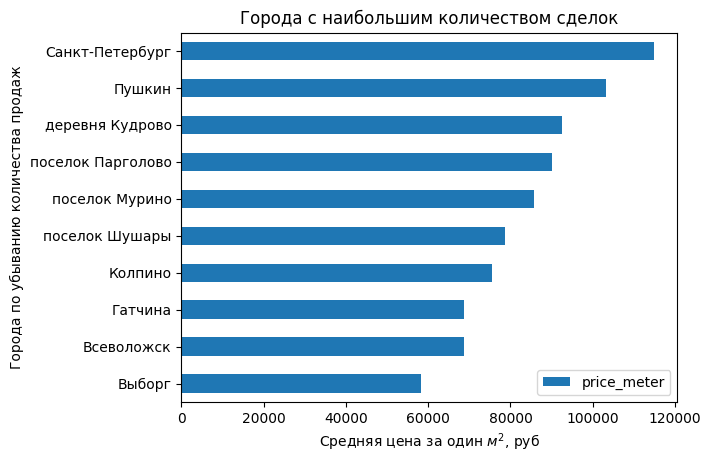

In [92]:
top.sort_values('price_meter').plot(x='locality_name', y='price_meter', kind='barh',title='Города с наибольшим количеством сделок')
plt.xlabel('Средняя цена за один $м^2$, руб')
plt.ylabel('Города по убыванию количества продаж')

Самые дорогие квадратные метры в Питере, Пушкине и деревне Кудррово. Самое доступное жилье - в Выборге, Гатчине и Всеволожске. 

---

<font color='blue'>Вывод по работе в разделе 4.4:  </font> Определили населенные пункты с наибольшим количеством сделок. Среди них нашли города с самым дорогим квадратным метром и самое доступное жилье. Города, где дольше всего надо копить на квартиру - Санкт-Петербург, Пушкин и дер.Кудрова. Самое доступное - Выборг, Гатчина и Всеволожск

---

#### Квартиры Санкт-Петербурга

В данном разделе рассмотрим среднюю стоимость на каждом километре от центра Санкт-Петербурга.


In [79]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
spb = (df[(df['locality_name']=='Санкт-Петербург') & 
          (df['centers_nearesе_km']!= -1)].groupby('centers_nearesе_km')['last_price'].mean())
spb

centers_nearesе_km
0    23442315.44
1    18850851.66
2    16163313.62
3    13453766.93
4    13632024.64
5    15306121.12
6    14389106.19
7    12797673.74
8     8449373.67
9     6428269.74
10    6378260.81
11    5977517.79
12    5972834.63
13    6025942.18
14    5769469.04
15    5546134.65
16    5527927.70
17    4865574.00
18    5334928.79
19    4678755.67
20    6344368.59
21    5183239.25
22    5425513.32
23    4126866.67
24    3862235.00
25    4014913.35
26    3575000.00
27    8300000.00
28    4910500.00
29    3833333.33
Name: last_price, dtype: float64

Выгляд логично, километры растут - цены падают. Попробуем визуализировать.

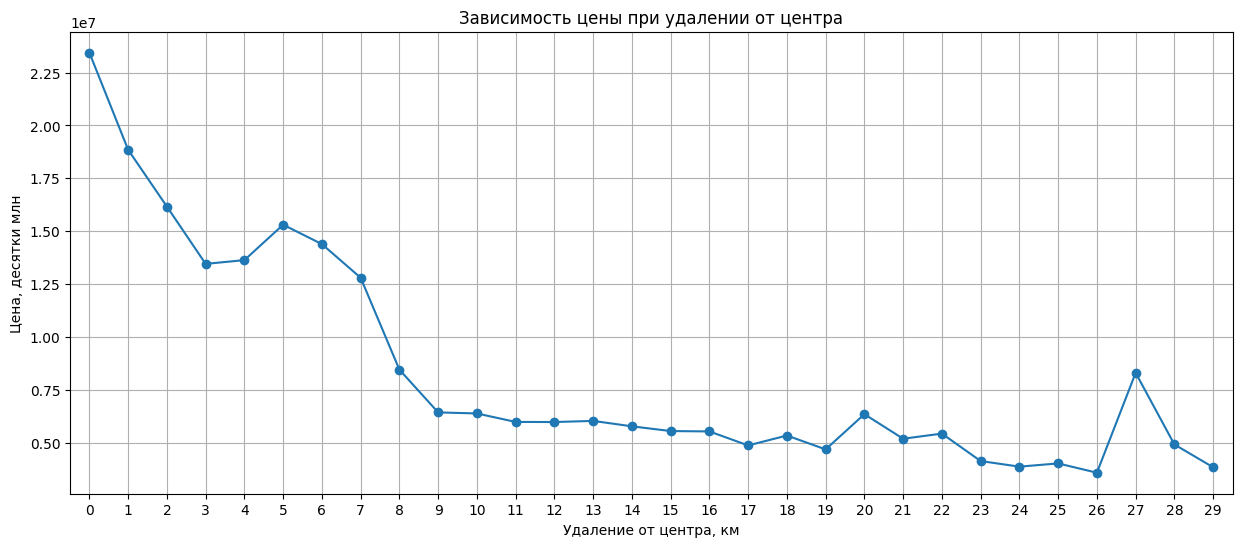

In [80]:
plt.figure(figsize=(15, 6))
plt.xlim(-0.5 ,29.5)
(spb.plot(grid=True, style='-o', 
          title='Зависимость цены при удалении от центра', 
          xlabel='Удаление от центра, км',
          ylabel='Цена, десятки млн'))
plt.xticks(np.arange(0,30,1))
plt.show()

Очевидные данные - хорошие данные. Дальше от центра недвижимость дешевеет. Есть пару заметных пиков - 5км и 27км. Возможно там находятся какие-то дорогие районы или элитные ЖК. 27 км - возможно новый элитный котеджный поселок. 

Рассмотрим пики 5км и 27км

In [81]:
display(df[(df['centers_nearesе_km']== 27) & (df['locality_name']=='Санкт-Петербург')])
df[(df['centers_nearesе_km']== 5) & (df['locality_name']=='Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km,type_price
748,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,unknown,False,False,25.00,0,Санкт-Петербург,23888,27313,1,1496,0,-1000,128,193918.92,2017,11,1,other,27,rich
5961,6,2250000,32.00,2018-02-27,1,-1000.00,2,16.50,2,unknown,False,False,7.00,0,Санкт-Петербург,24006,27431,0,-1000,0,-1000,178,70312.50,2018,2,1,last,27,poor


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,year,month,day,floor_type,centers_nearesе_km,type_price
106,9,10500000,124.10,2017-05-25,5,3.20,4,79.40,3,unknown,False,False,20.00,0,Санкт-Петербург,26825,5527,1,384,0,-1000,6,84609.19,2017,5,3,other,5,rich
114,5,4000000,21.40,2019-02-07,1,2.90,8,8.30,7,unknown,False,False,6.30,0,Санкт-Петербург,27089,5791,2,488,1,286,-1000,186915.89,2019,2,3,other,5,medium
141,8,6500000,32.60,2019-02-27,1,-1000.00,5,18.50,5,unknown,False,False,5.50,0,Санкт-Петербург,24764,5448,0,-1000,0,-1000,-1000,199386.50,2019,2,2,last,5,medium
234,3,7820000,57.00,2019-04-18,2,-1000.00,5,33.00,3,unknown,False,False,8.00,0,Санкт-Петербург,26852,5700,2,586,0,-1000,-1000,137192.98,2019,4,3,other,5,rich
276,5,23900000,108.40,2018-11-15,3,3.06,7,-1000.00,6,unknown,False,False,-1000.00,0,Санкт-Петербург,26819,5026,1,657,1,678,96,220479.70,2018,11,3,other,5,super_rich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23536,8,6080000,70.00,2018-10-12,3,-1000.00,4,44.40,4,unknown,False,False,9.00,0,Санкт-Петербург,26446,5294,1,291,0,-1000,69,86857.14,2018,10,4,last,5,medium
23574,14,64990000,139.00,2015-11-24,3,3.00,8,3.00,8,unknown,False,False,16.00,1,Санкт-Петербург,33255,5975,1,630,3,100,280,467553.96,2015,11,1,last,5,super_rich
23588,7,8100000,69.00,2015-10-14,2,-1000.00,10,-1000.00,8,unknown,False,False,10.00,2,Санкт-Петербург,23617,5223,0,-1000,1,874,823,117391.30,2015,10,2,other,5,rich
23625,12,6700000,42.00,2019-02-13,2,2.70,5,24.00,5,unknown,False,False,6.10,0,Санкт-Петербург,30892,5749,1,498,1,837,26,159523.81,2019,2,2,last,5,medium


Ничего примечательного. Просто объекты дороже своих соседей. 

---

<font color='blue'>Вывод по работе в разделе 4.5:  </font> Доказали, что в центре Питера самые дорогие квартиры. По удалению от города цена начинает снижаться. Стоить отметить, что наблюдаются скачки в цене на 5 и 27км от центра, но ничего особенного в этих данных не выявлено. 

---

### Напишите общий вывод

Проделалась большая работа. Обработан датафрейм, хранящий данные о проданных квартирах в СПБ и его окрестностях. В предобработке данных поправили типы данных, изучили и обработали пропущенные значения. Потом добавили новые столбцы, которые в дальнейшем помогли определить зависимость цены квартиры от ее расположения, относительно центра. Изучили параметры, которые больше всего влияют на цену - им оказалась общая площадь. Так же смогли найти закономерность в том, что день, месяц, год и количество комнат влияют на цену квартиры.  Посмотрели самые дорогие и самые бюджетные населенные пукты Ленинградской области. Самым дорогим оказался Зеленогорск, а дешевой - деревня Старополье. 

В ходе исследования была проведена комплексная работа по предобработке и анализу данных о недвижимости. 
На этапе предобработки (раздел 2) были устранены проблемы с пропусками и некорректными значениями: пропуски в числовых столбцах заменены на "-1000", в нечисловых — на "unknown", что позволило избежать ошибок в дальнейшем анализе. Названия столбцов приведены к читаемому виду, обработаны скрытые дубликаты в столбце с локациями, а форматы данных (например, даты и целые числа) приведены к корректным типам. Также были выявлены странные значения (например, высота потолков 1 м или 100 м, жилая площадь 2 м², 60-этажные дома), которые не использовали для анализа категорий, где были данные вбросы. 

В разделе 3 добавили новые столбцы (цена за м², разбивка даты на день/месяц/год, тип этажа, расстояние до центра в км), что значительно упростило последующий анализ. На этапе анализа (раздел 4) изучены ключевые параметры недвижимости: определены эталонные характеристики для продажи, исследована скорость продаж (средний срок — 45–232 дня, быстрые продажи — до 50 дней, долгие — свыше 1400 дней), а также выявлены факторы, влияющие на цену. Наибольшая корреляция наблюдается с общей площадью, но также  на цену влияет количество комнат. Небольшая закономерность заметна и при изменении даты - день/месяц/год публикации.

Дополнительно проанализированы региональные особенности: определены города с наибольшим числом сделок, самые дорогие (Санкт-Петербург, Пушкин, дер. Кудрово) и доступные (Выборг, Гатчина, Всеволожск) варианты жилья. В Санкт-Петербурге подтверждена зависимость цены от удаленности от центра: в центре квартиры дороже, а по мере удаления цена снижается, хотя зафиксированы необычные скачки на 5 и 27 км.

В целом, данные приведены в пригодный для анализа вид, устранены основные проблемы, а результаты исследования позволяют сделать выводы о характеристиках недвижимости, скорости продаж и факторах ценообразования.

Среднестатистическая квартира обладает следующими параметрами:
Площадь – от 40 до 69 метров
Жилая площадь – от 18,5 до 42 метров
Кухня  -  от 7 до 11,1 метров
Цена – от 3,4 до 6,8 млн.руб.
Комнаты - от 1 до 3 штук
Потолки - от 2,5 до 2,8 метров
Расположение квартиры - не первый, не последний этаж. 
Расстояние до центра города - от 8,6 км до 15,5 км
Расстояние до парка - от 280 метров до 587